<a href="https://colab.research.google.com/github/ParkJeongUng/Ung.github.io/blob/master/_notebooks/%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8_%EB%B6%80%EC%8A%A4%ED%8C%85_GradientBoostingClassifier_%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8_%EA%B8%B0%EB%B0%98_%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8_%EB%B6%80%EC%8A%A4%ED%8C%85_HistGradientBoostingClassifier_XGBoost_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그레디언트 부스팅 GradientBoostingClassifier // 히스토그램 기반 그레디언트 부스팅 HistGradientBoostingClassifier // XGBoost // LightGBM

# 그레디언트 부스팅 GradientBoostingClassifier
* 이전 트리의 오차를 보완
* 깊이가 얕은 결정트리로 만든 확률적 경사 하강법

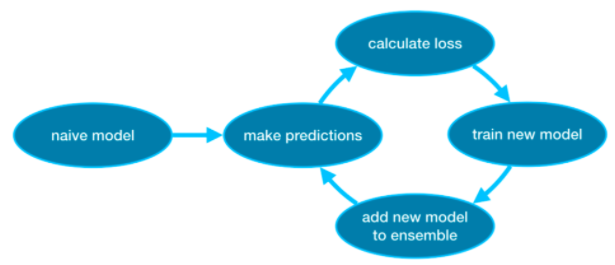

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 결정트리를 이용하는 알고리즘인데 가지치기를 하지 않아도 과대적합이 발생하지 않음

0.8881086892152563 0.8720430147331015


In [ ]:
# 결정트리의 개수를 늘려도 과대적합에 매우 강함
# 트리 갯수를 5배나 늘렸는데 이정도면 양호
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state = 42) 
# learning_rate 는 학습률 --> 이전 트리의 오차를 얼마나 보완할 것인지 --> defalt = 0.1
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 랜덤포레스트 보다 좋은 성능을 보여주지만 확률적 경사 하강법처럼 하나하나 내려가기 때문에 속도는 느림

0.9464595437171814 0.8780082549788999


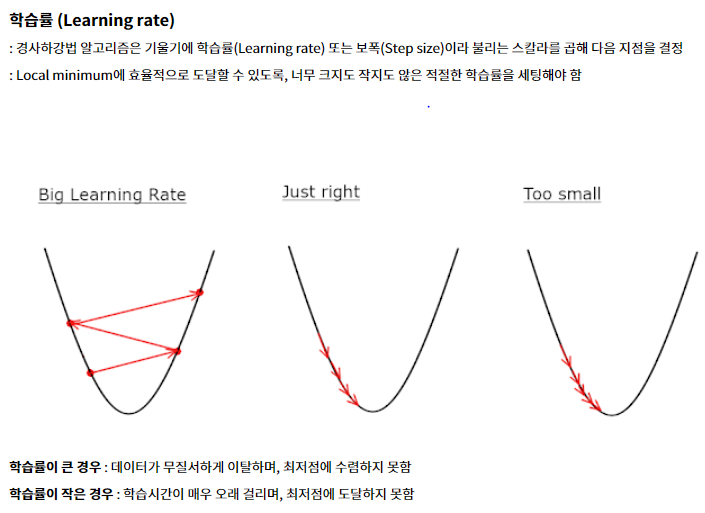![image.png]()

## 히스토그램 기반 그레디언트 부스팅
* 기존 그레디언트 부스팅의 속도와 성능을 개선한 모델
* 훈련 데이터를 256 (255 + 1) 개의 구간으로 나눈다 1개의 구간에는 데이터에 존재하는 누락값이 들어간다 --> 누락된 값에 대해 따로 전처리 해줄 필요가 없다.

In [ ]:
# 그레디언트 부스팅과 다르게 모델 성능을 높이는 매개변수로 max_iter 를 사용한다
from sklearn.experimental import enable_hist_gradient_boosting # 아직 테스트중인 모델
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
# hgb 의 특성중요도 계산 --> permutation_importance()
# 특성을 하나씩 랜덤하게 섞어가면서 모델의 성능이 변화하는지 관찰한다
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

# 2번째 특성에 과도하게 집중됨

[0.08876275 0.23438522 0.08027708]


In [ ]:
# permutation_importance() 는 훈련세트 뿐만 아니라 테스트 세트에도 적용 가능
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


## XGBoost
* 사이킷런 라이브러리 말고 다른 라이브러리를 이용해보자
* 균형잡힌 트리를 만든다


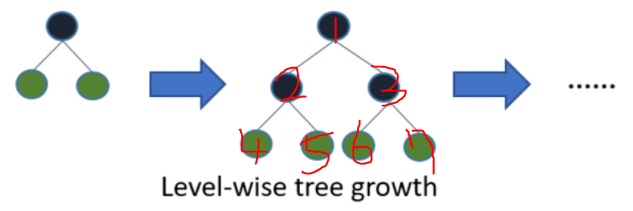

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42) 
# tree_method = 'hist' 로 하면 히스토그램 기반 그레디언트 부스팅을 사용하는 것
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


##LightGBM
* 리프노드를 향해서 달려간다
* 균형을 맞춰야하는 XGBoost 보다 속도가 빠르다

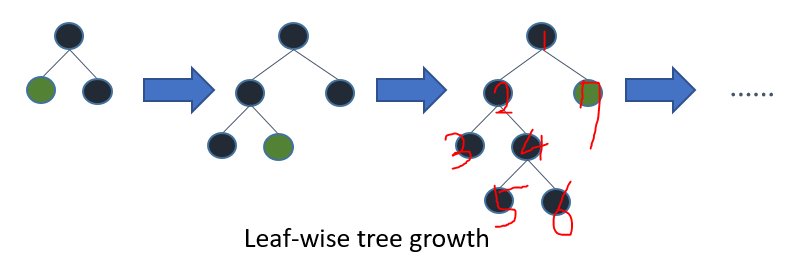

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293
